# EDA CRSP 2018 - 2023

In [1]:
!pip install seaborn

In [2]:
####### Import of utilities module to convert dataset from CSV to parquet #######

import sys
import os

# Add the parent directory to the sys.path
sys.path.insert(0, os.path.abspath('..'))
import utilities

####### Set up for each notebook #######
import sagemaker

# Define IAM role
import boto3
from sagemaker import get_execution_role

role = get_execution_role()
role

####### EDA specific libraries #######
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import datetime

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [3]:
# !pip install pyspark

In [4]:
# from pyspark.sql import SparkSession

# # Initialize Spark session
# spark = SparkSession.builder \
#     .appName("CRSP Data Processing") \
#     .getOrCreate()

# # Check Spark session
# spark

In [5]:
# # Define the path to CSV file
# file_path = "/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023.csv"

# # Load the CSV file into a Spark DataFrame
# df = spark.read.csv(file_path, header=True, inferSchema=True)

# # Show the schema of the DataFrame
# df.printSchema()

# # Display the first few rows of the DataFrame
# df.show(5)

In [6]:
# Establish S3 bucket connection
s3 = boto3.client('s3')
bucket = 'capstone-bucket-4-friends'

In [7]:
# Check out current contents of bucket
content = s3.list_objects(Bucket=bucket)["Contents"]
content

[{'Key': 'crsp_2018-2023.csv',
  'LastModified': datetime.datetime(2024, 6, 15, 0, 54, 13, tzinfo=tzlocal()),
  'ETag': '"f76ea3aa5b38f42249d7274b8ff13d24-204"',
  'Size': 3491063440,
  'StorageClass': 'STANDARD',
  'Owner': {'DisplayName': 'caopuzheng',
   'ID': '3e8e9fefba64fe47aada033ac68b6e97b3ca71a1d45879ebba28cd6aa5dcad55'}},
 {'Key': 'crsp_2023_clean.csv',
  'LastModified': datetime.datetime(2024, 6, 15, 0, 53, 45, tzinfo=tzlocal()),
  'ETag': '"d5464c66233f3c9eb4b1ea58643b6211-5"',
  'Size': 69245710,
  'StorageClass': 'STANDARD',
  'Owner': {'DisplayName': 'caopuzheng',
   'ID': '3e8e9fefba64fe47aada033ac68b6e97b3ca71a1d45879ebba28cd6aa5dcad55'}},
 {'Key': 'crsp_2023_clean.parquet',
  'LastModified': datetime.datetime(2024, 6, 15, 0, 13, 39, tzinfo=tzlocal()),
  'ETag': '"f5eb32894c2ee44835e6869ede9ec50a-10"',
  'Size': 81389066,
  'StorageClass': 'STANDARD',
  'Owner': {'DisplayName': 'caopuzheng',
   'ID': '3e8e9fefba64fe47aada033ac68b6e97b3ca71a1d45879ebba28cd6aa5dcad55'}},

In [8]:
print(os.getcwd())

/home/sagemaker-user/capstone-2024-summer/jenna


In [9]:
# Load in raw 2018 - 2023 CRSP data from personal data folder bucket
file_path = "/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023.csv"

In [10]:
# data types from colab notebook
dtype_spec = {
    'PERMNO': 'int64',
    'date': 'object',
    'NAMEENDT': 'object',
    'SHRCD': 'float64',
    'EXCHCD': 'float64',
    'SICCD': 'object',
    'NCUSIP': 'object',
    'TICKER': 'object',
    'COMNAM': 'object',
    'SHRCLS': 'object',
    'TSYMBOL': 'object',
    'NAICS': 'float64',
    'PRIMEXCH': 'object',
    'TRDSTAT': 'object',
    'SECSTAT': 'object',
    'PERMCO': 'int64',
    'ISSUNO': 'int64',
    'HEXCD': 'int64',
    'HSICCD': 'object',
    'CUSIP': 'object',
    'DCLRDT': 'object',
    'DLAMT': 'float64', # present in 2023 single year df but not 5 year
    'DLPDT': 'object',
    'DLSTCD': 'float64',
    'NEXTDT': 'object',
    'PAYDT': 'object',
    'RCRDDT': 'object',
    'SHRFLG': 'float64',
    'HSICMG': 'float64',
    'HSICIG': 'float64',
    'DISTCD': 'float64',
    'DIVAMT': 'float64',
    'FACPR': 'float64',
    'FACSHR': 'float64',
    'ACPERM': 'float64', # present in 2023 single year df but not 5 year
    'ACCOMP': 'float64',
    'SHRENDDT': 'object',
    'NWPERM': 'float64',
    'DLRETX': 'object',
    'DLPRC': 'float64',
    'DLRET': 'object', # present in 2023 single year df but not 5 year
    'TRTSCD': 'float64',
    'NMSIND': 'float64',
    'MMCNT': 'float64',
    'NSDINX': 'float64',
    'BIDLO': 'float64',
    'ASKHI': 'float64',
    'PRC': 'float64',
    'VOL': 'float64',
    'RET': 'object',
    'BID': 'float64',
    'ASK': 'float64',
    'SHROUT': 'float64',
    'CFACPR': 'float64',
    'CFACSHR': 'float64',
    'OPENPRC': 'float64',
    'NUMTRD': 'float64',
    'RETX': 'object',
    'vwretd': 'float64',
    'vwretx': 'float64',
    'ewretd': 'float64',
    'ewretx': 'float64',
    'sprtrn': 'float64'
}

In [11]:
# Read the CSV file with specified data types
df = pd.read_csv(file_path, dtype=dtype_spec, low_memory=False)

# Check the DataFrame info to confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12665502 entries, 0 to 12665501
Data columns (total 63 columns):
 #   Column    Dtype  
---  ------    -----  
 0   PERMNO    int64  
 1   date      object 
 2   NAMEENDT  object 
 3   SHRCD     float64
 4   EXCHCD    float64
 5   SICCD     object 
 6   NCUSIP    object 
 7   TICKER    object 
 8   COMNAM    object 
 9   SHRCLS    object 
 10  TSYMBOL   object 
 11  NAICS     float64
 12  PRIMEXCH  object 
 13  TRDSTAT   object 
 14  SECSTAT   object 
 15  PERMCO    int64  
 16  ISSUNO    int64  
 17  HEXCD     int64  
 18  HSICCD    object 
 19  CUSIP     object 
 20  DCLRDT    object 
 21  DLAMT     float64
 22  DLPDT     object 
 23  DLSTCD    float64
 24  NEXTDT    object 
 25  PAYDT     object 
 26  RCRDDT    object 
 27  SHRFLG    float64
 28  HSICMG    float64
 29  HSICIG    float64
 30  DISTCD    float64
 31  DIVAMT    float64
 32  FACPR     float64
 33  FACSHR    float64
 34  ACPERM    float64
 35  ACCOMP    float64
 36  SHREND

In [12]:
df.head()

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACPR,CFACSHR,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,10026,2018-01-02,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,152.39000,1036.0,-0.017454,0.008505,0.008471,0.011232,0.011214,0.008303
1,10026,2018-01-03,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,149.07001,1283.0,-0.009988,0.005856,0.005852,0.005103,0.005094,0.006399
2,10026,2018-01-04,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,147.77000,1138.0,0.013813,0.004001,0.003858,0.005272,0.005217,0.004029
3,10026,2018-01-05,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,149.74001,745.0,-0.009550,0.005804,0.005802,0.003880,0.003865,0.007034
4,10026,2018-01-08,NaN,11.0,3.0,2052,46603210,JJSF,J & J SNACK FOODS CORP,NaN,...,1.0,1.0,147.77000,990.0,0.000742,0.001816,0.001802,0.000584,0.000574,0.001662


In [13]:
df.shape

(12665502, 63)

In [14]:
date_columns = ['date', 'NAMEENDT', 'DCLRDT', 'DLPDT', 'NEXTDT', 'PAYDT', 'RCRDDT', 'SHRENDDT']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

## Look at Nulls

In [15]:
null_table = df.isnull().sum().reset_index()
null_table.columns = ['Column', 'Null Values']

# Add column to show the percentage of null values
null_table['Percentage'] = (null_table['Null Values'] / len(df)) * 100

# Sorting the table by the number of null values in descending order
null_table_sorted = null_table.sort_values(by='Null Values', ascending=False).reset_index(drop=True)
null_table_sorted

,Column,Null Values,Percentage
0,NEXTDT,12664949,99.995634
1,ACPERM,12664386,99.991189
2,ACCOMP,12663987,99.988038
3,DLPDT,12662203,99.973953
4,NWPERM,12652744,99.899270
...,...,...,...
58,vwretd,0,0.000000
59,vwretx,0,0.000000
60,ewretd,0,0.000000
61,ewretx,0,0.000000


In [16]:
# Percentage of company delisted
delisted = (df['DLSTCD'].count()/ len(df)) * 100
print(f'{delisted}%')

0.10073031451891919%


## Drop columns that have over 80% nulls

In [17]:
columns_to_drop = null_table_sorted[null_table_sorted['Percentage'] > 80]['Column'].tolist()
df = df.drop(columns_to_drop, axis=1)

In [18]:
# See which columns were dropped
df.columns.tolist()

['PERMNO',
 'date',
 'SHRCD',
 'EXCHCD',
 'SICCD',
 'NCUSIP',
 'TICKER',
 'COMNAM',
 'TSYMBOL',
 'NAICS',
 'PRIMEXCH',
 'TRDSTAT',
 'SECSTAT',
 'PERMCO',
 'ISSUNO',
 'HEXCD',
 'HSICCD',
 'CUSIP',
 'HSICMG',
 'HSICIG',
 'BIDLO',
 'ASKHI',
 'PRC',
 'VOL',
 'RET',
 'BID',
 'ASK',
 'SHROUT',
 'CFACPR',
 'CFACSHR',
 'OPENPRC',
 'NUMTRD',
 'RETX',
 'vwretd',
 'vwretx',
 'ewretd',
 'ewretx',
 'sprtrn']

Note: dropped columns are the same from EDA 2023 notebook.

## Check out trade status variable ('TRDSTAT')

#### TRDSTAT codes table:

| Code | Status    |
|------|-----------|
| A    | Active    |
| H    | Halted    |
| S    | Suspended |
| X    | Unknown   |

In [19]:
# Display the number of rows before grouping
num_rows_before = len(df)
print(f"Number of rows before grouping: {num_rows_before}")

# Group by 'TRDSTAT' and count the number of rows in each group
grouped = df.groupby('TRDSTAT').size().reset_index(name='Count')
print("\nNumber of rows in each group after grouping by 'TRDSTAT':")
print(grouped)

# Display the total number of rows after grouping
num_rows_after = grouped['Count'].sum()
print(f"\nTotal number of rows after grouping: {num_rows_after}")

Number of rows before grouping: 12665502

Number of rows in each group after grouping by 'TRDSTAT':
  TRDSTAT     Count
0       A  12621768
1       H        75
2       S      3580
3       X     39599

Total number of rows after grouping: 12665022


## Check outcome variable ('RET' = returns)

In [20]:
# Convert 'RET' to numeric and replace non-numeric values with NaN
df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

# Drop rows where 'RET' is NaN (non-numeric values)
df = df.dropna(subset=['RET'])

print(f"DF shape before: {df.shape}")
print(f"DF shape after removing non-numeric 'RET' values: {df.shape}")

DF shape before: (12612404, 38)
DF shape after removing non-numeric 'RET' values: (12612404, 38)


## Check the 'TRDSTAT' after 'RET' clean-up

In [21]:
# Display the number of rows before grouping
num_rows_before = len(df)
print(f"Number of rows before grouping: {num_rows_before}")

# Group by 'TRDSTAT' and count the number of rows in each group
grouped = df.groupby('TRDSTAT').size().reset_index(name='Count')
print("\nNumber of rows in each group after grouping by 'TRDSTAT':")
print(grouped)

# Display the total number of rows after grouping
num_rows_after = grouped['Count'].sum()
print(f"\nTotal number of rows after grouping: {num_rows_after}")

Number of rows before grouping: 12612404

Number of rows in each group after grouping by 'TRDSTAT':
  TRDSTAT     Count
0       A  12612404

Total number of rows after grouping: 12612404


## Check the industry variable ('NAICS')

In [22]:
# Display the number of rows before grouping
num_rows_before = len(df)
print(f"Number of rows before grouping: {num_rows_before}")

# Group by 'NAICS' and count the number of rows in each group
grouped_naics = df.groupby('NAICS').size().reset_index(name='Count')
grouped_naics_sorted = grouped_naics.sort_values(by='Count', ascending=False)
print("\nNumber of rows in each group after grouping by 'NAICS':")
print(grouped_naics_sorted)

# Display the total number of rows after grouping
num_rows_after = grouped_naics_sorted['Count'].sum()
print(f"\nTotal number of rows after grouping: {num_rows_after}")

Number of rows before grouping: 12612404

Number of rows in each group after grouping by 'NAICS':
        NAICS    Count
663  525990.0  4108216
646  523910.0   598281
187  325412.0   576761
623  522110.0   436364
661  525910.0   278508
..        ...      ...
533  456120.0       26
482  444240.0       19
506  449121.0       13
507  449129.0        7
699  541519.0        4

[842 rows x 2 columns]

Total number of rows after grouping: 12500416


In [23]:
grouped_naics_sorted.head(10)

,NAICS,Count
663,525990.0,4108216
646,523910.0,598281
187,325412.0,576761
623,522110.0,436364
661,525910.0,278508
664,531110.0,224983
736,561499.0,203531
587,511210.0,198006
709,541715.0,148826
389,339112.0,133268


In [24]:
naics_code_lookup = {
                      525990.0: '525990 - Other Financial Vehicles',
                      523910.0: '523910 - Miscellaneous Intermediation',
                      325412.0: '325412 - Pharmaceutical Preparation Manufacturing',
                      522110.0: '522110 - Commercial Banking',
                      525910.0: '525910 - Open-End Investment Funds',
                      531110.0: '531110 - Lessors of Residential Buildings and Dwellings',
                      561499.0: '561499 - All Other Business Support Services',
                      511210.0: '511210 - Unknown',
                      541715.0: '541715 - Research and Development in the Physical, Engineering, and Life Sciences (except Nanotechnology and Biotechnology)',
                      339112.0: '339112 - Surgical and Medical Instrument Manufacturing',
                    }

# Replace top 10 NAICS codes with their descriptions
grouped_naics_sorted['NAICS'] = grouped_naics_sorted['NAICS'].map(naics_code_lookup).fillna(grouped_naics_sorted['NAICS'])

print("\nTop 10 NAICS codes with their descriptions:")
grouped_naics_sorted.head(10)


Top 10 NAICS codes with their descriptions:


,NAICS,Count
663,525990 - Other Financial Vehicles,4108216
646,523910 - Miscellaneous Intermediation,598281
187,325412 - Pharmaceutical Preparation Manufacturing,576761
623,522110 - Commercial Banking,436364
661,525910 - Open-End Investment Funds,278508
664,531110 - Lessors of Residential Buildings and ...,224983
736,561499 - All Other Business Support Services,203531
587,511210 - Unknown,198006
709,541715 - Research and Development in the Physi...,148826
389,339112 - Surgical and Medical Instrument Manuf...,133268


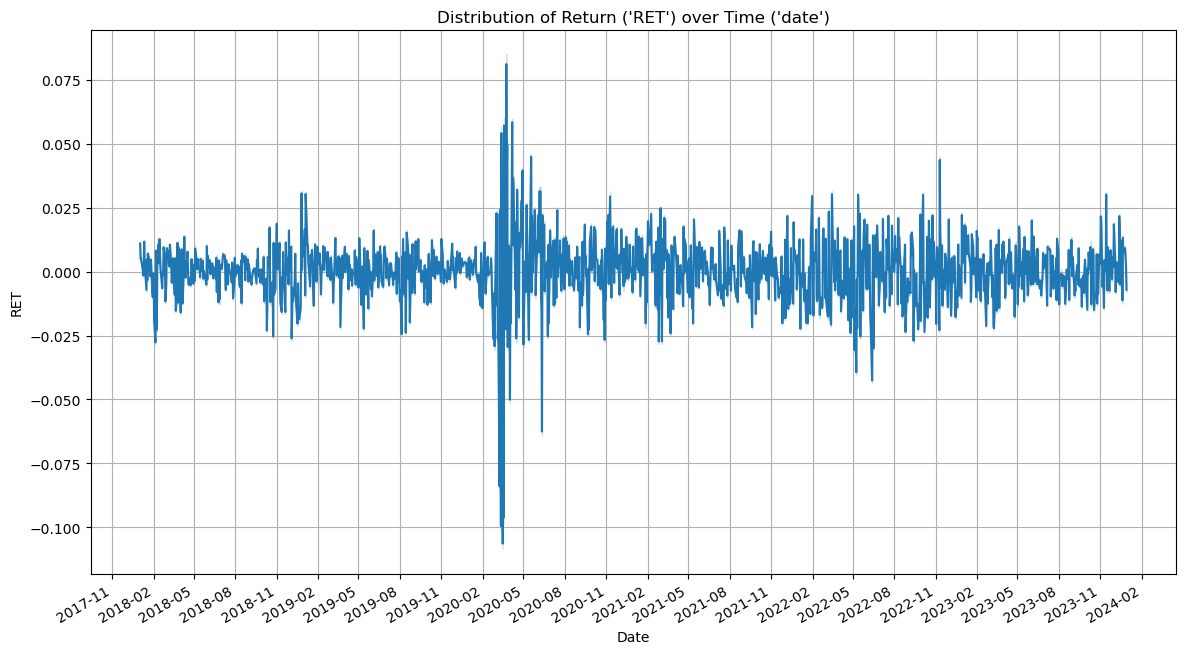

In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Plotting the distribution of the 'RET' column by the 'date' column
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='date', y='RET')
plt.title("Distribution of Return ('RET') over Time ('date')")
plt.xlabel('Date')
plt.ylabel('RET')
plt.grid(True)

# Set x-axis major formatter to display month and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()
plt.xticks(fontsize=10)

plt.show()

## Check what cleaning would accomplish

In [26]:
def additional_cleaning(df):
    """Additional cleaning steps."""
    # Keep only securities with more than 128 days of return records
    df = df.groupby('PERMNO').filter(lambda x: len(x) > 128)
    
    # Remove severe outliers
    df['RET'] = pd.to_numeric(df['RET'], errors='coerce')
    df = df[df['RET'].between(df['RET'].quantile(0.01), df['RET'].quantile(0.99))]
    
    # Apply log transformation and normalization to the return
    df['RET'] = np.log1p(df['RET'])
    df['RET'] = (df['RET'] - df['RET'].mean()) / df['RET'].std()
    
    # Create additional features
    df['market_return'] = df['vwretd']  # Value-Weighted Return (includes distributions)
    # Extract the first two digits of the NAICS code, which typically represent the broad industry classification
    df['industry'] = df['NAICS'].apply(lambda x: str(x)[:2] if pd.notnull(x) else 'Unknown') 
    
    return df

df_cleaned = additional_cleaning(df.copy())

In [27]:
# Sanity check - date range before and after cleaning
date_range_before = (df['date'].min(), df['date'].max())
date_range_after = (df_cleaned['date'].min(), df_cleaned['date'].max())

print(f"Date range before cleaning: {date_range_before}")
print(f"Date range after cleaning: {date_range_after}")

Date range before cleaning: (Timestamp('2018-01-02 00:00:00'), Timestamp('2023-12-29 00:00:00'))
Date range after cleaning: (Timestamp('2018-01-02 00:00:00'), Timestamp('2023-12-29 00:00:00'))


### Keep only securities with more than 128 days of return records

In [28]:
# Number of unique PERMNOs before and after cleaning
num_permnos_before = df['PERMNO'].nunique()
num_permnos_after = df_cleaned['PERMNO'].nunique()

print(f"Number of unique PERMNOs before cleaning: {num_permnos_before}")
print(f"Number of unique PERMNOs after cleaning: {num_permnos_after}")

Number of unique PERMNOs before cleaning: 12752
Number of unique PERMNOs after cleaning: 11986


### Removes any securities containing severe outliers such as large change in returns in a short period of time

In [29]:
# Summary statistics for RET before and after cleaning
ret_summary_before = df['RET'].describe()
ret_summary_after = df_cleaned['RET'].describe()

print("Summary statistics for RET before cleaning:")
print(ret_summary_before)

print("\nSummary statistics for RET after cleaning:")
print(ret_summary_after)

Summary statistics for RET before cleaning:
count    1.261240e+07
mean     2.969563e-04
std      4.305505e-02
min     -9.543060e-01
25%     -1.018000e-02
50%      0.000000e+00
75%      9.812000e-03
max      3.972530e+01
Name: RET, dtype: float64

Summary statistics for RET after cleaning:
count    1.231083e+07
mean     2.870376e-17
std      1.000000e+00
min     -4.103753e+00
25%     -3.871489e-01
50%      1.818699e-02
75%      4.058848e-01
max      4.088944e+00
Name: RET, dtype: float64


### Apply log transformation and normalization to the return

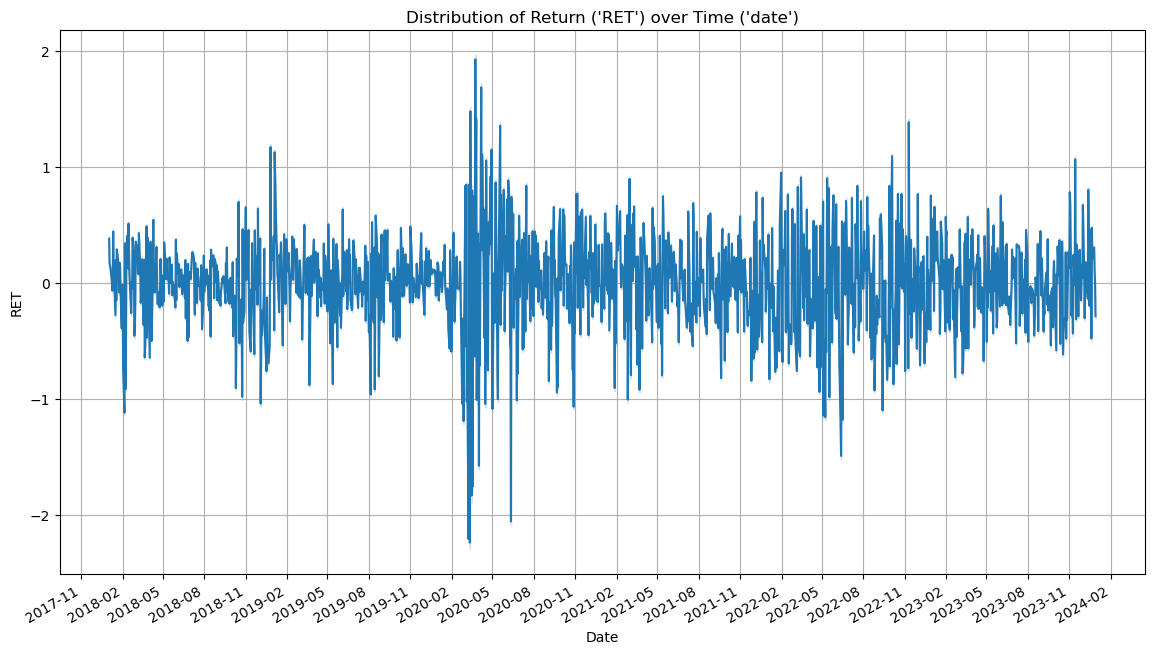

In [30]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Plotting the distribution of the 'RET' column by the 'date' column
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_cleaned, x='date', y='RET')
plt.title("Distribution of Return ('RET') over Time ('date')")
plt.xlabel('Date')
plt.ylabel('RET')
plt.grid(True)

# Set x-axis major formatter to display month and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()
plt.xticks(fontsize=10)

plt.show()

## Create additional features

In [31]:
# Apply the additional cleaning function
df_cleaned = additional_cleaning(df.copy())

# Display unique values of 'NAICS' and 'industry'
unique_naics = df_cleaned['NAICS'].nunique()
unique_industry = df_cleaned['industry'].nunique()

print(f"Unique values in 'NAICS' column:\n{unique_naics}")
print(f"\nUnique values in 'industry' column:\n{unique_industry}")

Unique values in 'NAICS' column:
837

Unique values in 'industry' column:
29


In [32]:
df_cleaned['industry'].unique().tolist()

['31',
 '44',
 '42',
 '33',
 '62',
 '52',
 '51',
 '54',
 '23',
 '32',
 '22',
 '56',
 '55',
 '48',
 '53',
 '45',
 '21',
 'Unknown',
 '49',
 '11',
 '72',
 '81',
 '61',
 '71',
 '92',
 '99',
 '67',
 '73',
 '10']

In [33]:
# Display the value counts of 'NAICS' and 'industry' columns to understand their distribution
naics_value_counts = df_cleaned['NAICS'].value_counts(dropna=False)
industry_value_counts = df_cleaned['industry'].value_counts()

print(f"\nValue counts in 'NAICS' column:\n{naics_value_counts}")
print(f"\nValue counts in 'industry' column:\n{industry_value_counts}")


Value counts in 'NAICS' column:
NAICS
525990.0    4065044
523910.0     579777
325412.0     546459
522110.0     432559
525910.0     277271
             ...   
332995.0         26
444240.0         18
449121.0         13
449129.0          4
541519.0          2
Name: count, Length: 838, dtype: int64

Value counts in 'industry' column:
industry
52         5983713
33         1226710
32          976019
54          588898
51          546649
21          402325
53          381005
56          316740
42          269798
48          213225
31          190855
44          173837
62          155134
55          153423
22          150651
72          114705
Unknown     105802
45          104563
23           98200
71           41908
61           41875
81           33028
11           26244
49            9316
92            5528
99             592
73              33
67              27
10              27
Name: count, dtype: int64
